Heteroscedastic Regression with Uncertainty Estimation (Univariate Case)
___

In [2]:
from dynamodelx import UFA
from sklearn.datasets import fetch_california_housing, make_regression
from dynamodelx.plots import draw_plots

In [54]:
data = fetch_california_housing()
X, y = data.data, data.target

ufa = UFA(
    task='regression', 
    model_size='small', 
    input_dim=X.shape[1],
    output_dim=1, # Don't have to incorporate variance dimensions, model will take care of it.
    loss='gaussian_nll_loss',
    device='cuda',
    custom_architecture=None, 
    weights_init='he', 
    hidden_activation='relu',
    optimizer='adam',
    return_metrics=True,
    auto_build=True,
    multiclass=False,
    uncertainty=True # True for heteroscedastic regression
)

performance = ufa.train(
                    X=X,
                    y=y,
                    epochs=70,
                    learning_rate=0.001,
                    momentum=None,
                    val_size=0.2,
                    test_size=0.1,
                    batch_size=64
                )

Model Configuration:

  Task:               regression
  Model Size:         small
  Input Dimension:    8
  Output Dimension:   1
  Loss                gaussian_nll_loss
  Device:             cuda
  Hidden Activation:  relu
  Optimizer:          adam
  Weights Init:       he
  Uncertainty:        True
  Multiclass:         False
  Custom Architecture:None

Building the model ...

===== Built Model =====
Linear(in_features=8, out_features=64, bias=True)
ReLU()
Linear(in_features=64, out_features=32, bias=True)
ReLU()
Linear(in_features=32, out_features=2, bias=True)

Total parameters: 2,722
Trainable parameters: 2,722
Non-trainable parameters: 0

Model successfully built

Average train loss per sample : 0.6629583787416435 
Average validation loss per sample : 0.817443592141765

For 10% Confidence Level --> PICP: 0.0984, MPIW: 0.1301

For 20% Confidence Level --> PICP: 0.2040, MPIW: 0.2623

For 30% Confidence Level --> PICP: 0.3014, MPIW: 0.3989

For 40% Confidence Level --> PICP: 0.408

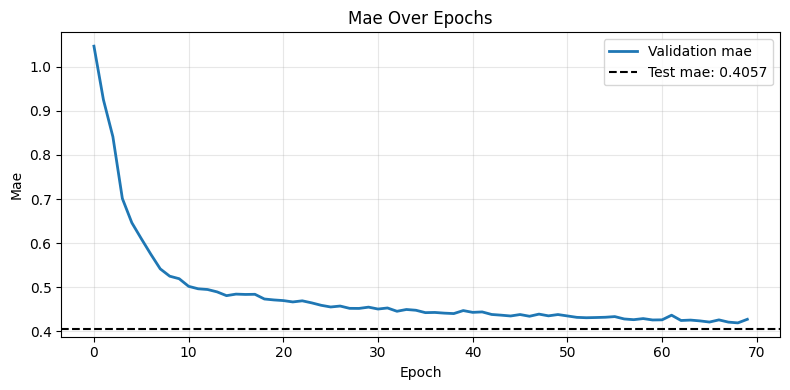

In [55]:
draw_plots(performance=performance)

In [56]:
performance.test

{'test_mae': 0.4056588113307953, 'test_r2': 0.756982684135437}

In [57]:
predictions = ufa.predict(X[:5])
print('Predictions:', predictions[0])
print('Standard-deviation for each prediction:', predictions[1])

Predictions: [4.362465  4.8163376 4.420436  3.424319  2.656123 ]
Standard-deviation for each prediction: [0.6146569  0.57194173 1.0263927  0.7226471  0.7023065 ]


In [58]:
ufa.save(parameters_path='univariate_uncertainty_params.pt', arguments_path='univariate_uncertainty_args.pt')

Model's state successfully saved to: univariate_uncertainty_params.pt
Model's architecture successfully saved to: univariate_uncertainty_args.pt


In [ ]:
ufa = UFA.load(parameters_path='univariate_uncertainty_params.pt', arguments_path='univariate_uncertainty_args.pt')
ufa.predict(X[:5])

Model Configuration:

  Task:               regression
  Model Size:         small
  Input Dimension:    8
  Output Dimension:   1
  Loss                gaussian_nll_loss
  Device:             cuda
  Hidden Activation:  relu
  Optimizer:          adam
  Weights Init:       Default
  Uncertainty:        True
  Multiclass:         False
  Custom Architecture:None

Building the model ...

===== Built Model =====
Linear(in_features=8, out_features=64, bias=True)
ReLU()
Linear(in_features=64, out_features=32, bias=True)
ReLU()
Linear(in_features=32, out_features=2, bias=True)

Total parameters: 2,722
Trainable parameters: 2,722
Non-trainable parameters: 0

Model successfully built



(array([4.362465 , 4.8163376, 4.420436 , 3.424319 , 2.656123 ],
       dtype=float32),
 array([0.6146569 , 0.57194173, 1.0263927 , 0.7226471 , 0.7023065 ],
       dtype=float32))

Heteroscedastic Regression with Uncertainty Estimation (Multi-Target Case)
___

In [75]:
output_dim = 2

X, y  = make_regression(
    n_samples = 3000,
    n_features = 8,
    n_informative=1,
    n_targets = output_dim
)

In [76]:
ufa = UFA(
    task='regression', 
    model_size='medium', 
    input_dim=X.shape[1],
    output_dim=output_dim,
    loss='gaussian_nll_loss',
    device='cuda',
    custom_architecture=None, 
    weights_init='he',
    hidden_activation='relu',
    optimizer='adam',
    return_metrics=True,
    auto_build=True,
    multiclass=False,
    uncertainty=True # True for heteroscedastic regression
)

performance = ufa.train(
                    X=X,
                    y=y,
                    epochs=70,
                    learning_rate=0.003,
                    momentum=None,
                    val_size=0.2,
                    test_size=0.1,
                    batch_size=64
                )

Model Configuration:

  Task:               regression
  Model Size:         medium
  Input Dimension:    8
  Output Dimension:   2
  Loss                gaussian_nll_loss
  Device:             cuda
  Hidden Activation:  relu
  Optimizer:          adam
  Weights Init:       he
  Uncertainty:        True
  Multiclass:         False
  Custom Architecture:None

Building the model ...

===== Built Model =====
Linear(in_features=8, out_features=128, bias=True)
ReLU()
Linear(in_features=128, out_features=64, bias=True)
ReLU()
Linear(in_features=64, out_features=32, bias=True)
ReLU()
Linear(in_features=32, out_features=4, bias=True)

Total parameters: 11,620
Trainable parameters: 11,620
Non-trainable parameters: 0

Model successfully built

Average train loss per sample : 1.2770777609234765 
Average validation loss per sample : 1.482942123413086

For 10% Confidence Level --> PICP: [0.1000, 0.0900], MPIW: [0.3362, 0.1386]

For 20% Confidence Level --> PICP: [0.1800, 0.1767], MPIW: [0.6779, 0.2

In [77]:
draw_plots(performance=performance)

In [78]:
performance.test

{'test_mae': 0.8443025350570679, 'test_r2': 0.9985237121582031}

In [79]:
predictions = ufa.predict(X[:5])
print('Predictions:\n', predictions[0])
print('Standard deviation for each prediction:\n', predictions[1])

Predictions:
 [[ -4.3470373  -2.075515 ]
 [-51.073547  -22.501625 ]
 [-13.867328   -5.7229476]
 [-12.781764   -5.599988 ]
 [  4.4216967   1.8532096]]
Standard deviation for each prediction:
 [[1.6542606  0.495794  ]
 [1.529302   0.67911965]
 [0.901265   0.5860478 ]
 [1.0308089  0.52631974]
 [1.3156292  0.6069885 ]]


In [80]:
ufa.save(parameters_path='multi_target_uncertainty_params.pt', arguments_path='multi_target_uncertainty_args.pt')

Model's state successfully saved to: multi_target_uncertainty_params.pt
Model's architecture successfully saved to: multi_target_uncertainty_args.pt


In [ ]:
ufa = UFA.load(parameters_path='multi_target_uncertainty_params.pt', arguments_path='multi_target_uncertainty_args.pt')
ufa.predict(X[:5])

Model Configuration:

  Task:               regression
  Model Size:         medium
  Input Dimension:    8
  Output Dimension:   2
  Loss                gaussian_nll_loss
  Device:             cuda
  Hidden Activation:  relu
  Optimizer:          adam
  Weights Init:       Default
  Uncertainty:        True
  Multiclass:         False
  Custom Architecture:None

Building the model ...

===== Built Model =====
Linear(in_features=8, out_features=128, bias=True)
ReLU()
Linear(in_features=128, out_features=64, bias=True)
ReLU()
Linear(in_features=64, out_features=32, bias=True)
ReLU()
Linear(in_features=32, out_features=4, bias=True)

Total parameters: 11,620
Trainable parameters: 11,620
Non-trainable parameters: 0

Model successfully built



(array([[ -4.3470373,  -2.075515 ],
        [-51.073547 , -22.501625 ],
        [-13.867328 ,  -5.7229476],
        [-12.781764 ,  -5.599988 ],
        [  4.4216967,   1.8532096]], dtype=float32),
 array([[1.6542606 , 0.495794  ],
        [1.529302  , 0.67911965],
        [0.901265  , 0.5860478 ],
        [1.0308089 , 0.52631974],
        [1.3156292 , 0.6069885 ]], dtype=float32))